In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cassava dataset distribution

In [2]:
df_image_labels = pd.read_csv("image_labels.csv")

In [3]:
df_image_labels.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [4]:
df_value_counts = df_image_labels.label.value_counts(sort=False)

In [5]:
dict_class_mapping = {
    0 : "CBB",
    1 : "CBSD",
    2 : "CGM",
    3 : "CMD",
    4 : "Healthy"
}

/tmp/ipykernel_8453/58376266.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


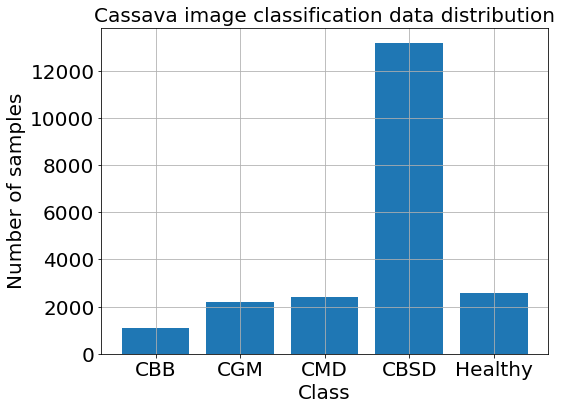

In [6]:
fig = plt.figure(figsize=(8, 6))
plt.bar(df_value_counts.index.to_numpy(), df_value_counts.to_numpy())
plt.grid()
plt.xticks(df_value_counts.index.to_numpy(), np.array(list(dict_class_mapping.values())), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Class", fontsize=20)
plt.ylabel("Number of samples", fontsize=20)
plt.title("Cassava image classification data distribution", fontsize=20)
fig.show()

In [7]:
df_image_labels.shape

(21397, 2)

In [8]:
print(df_value_counts)

0     1087
3    13158
1     2189
2     2386
4     2577
Name: label, dtype: int64


## Train metrics with pretrained ResNet-34

In [9]:
csv_train_pre = "model_pretrained/train_metrics.csv"

In [10]:
df_train_pre = pd.read_csv(csv_train_pre)

In [11]:
df_train_pre.head()

,epoch,loss_train,loss_valid,accuracy_train,accuracy_valid
0,1,0.573119,0.478009,79.558585,83.177570
1,2,0.407413,0.474787,85.978578,84.404206
2,3,0.352284,0.440824,88.081792,85.572430
3,4,0.310307,0.510448,89.302175,83.177570
4,5,0.277515,0.500828,90.249919,83.119159


/tmp/ipykernel_8453/3630046245.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


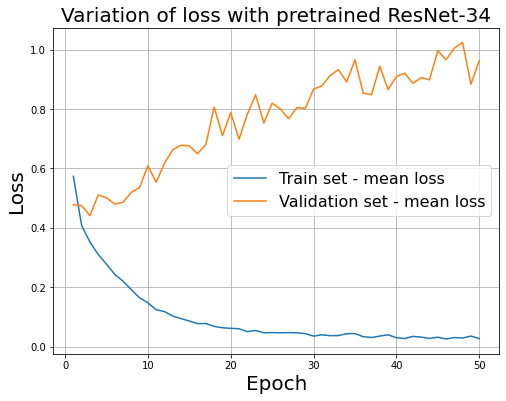

In [12]:
fig = plt.figure(figsize=(8, 6))
plt.plot(df_train_pre.epoch, df_train_pre.loss_train, "-", label="Train set - mean loss")
plt.plot(df_train_pre.epoch, df_train_pre.loss_valid, "-", label="Validation set - mean loss")
plt.ylabel("Loss", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.title("Variation of loss with pretrained ResNet-34", fontsize=20)
plt.legend(fontsize=16)
plt.grid()
fig.show()

/tmp/ipykernel_8453/3402659058.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


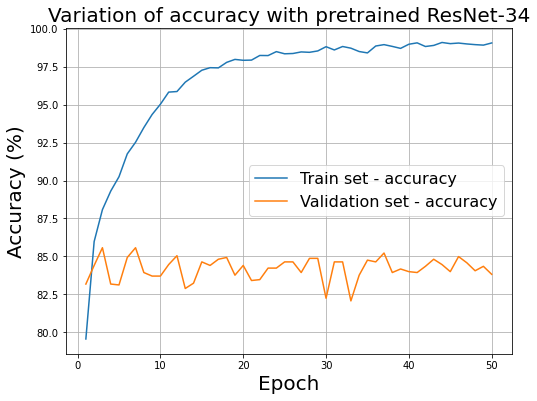

In [13]:
fig = plt.figure(figsize=(8, 6))
plt.plot(df_train_pre.epoch, df_train_pre.accuracy_train, "-", label="Train set - accuracy")
plt.plot(df_train_pre.epoch, df_train_pre.accuracy_valid, "-", label="Validation set - accuracy")
plt.ylabel("Accuracy (%)", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.title("Variation of accuracy with pretrained ResNet-34", fontsize=20)
plt.legend(fontsize=16)
plt.grid()
fig.show()

## Train metrics with randomized ResNet-34

In [14]:
csv_train_random = "model_random/train_metrics.csv"

In [15]:
df_train_random = pd.read_csv(csv_train_random)

In [16]:
df_train_random.head()

,epoch,loss_train,loss_valid,accuracy_train,accuracy_valid
0,1,1.012995,1.025717,62.992535,60.689252
1,2,0.884776,0.893674,66.199286,65.245327
2,3,0.806337,0.893135,69.036027,65.654206
3,4,0.745878,0.960209,71.496267,59.988318
4,5,0.697647,0.732327,73.930542,72.780374


/tmp/ipykernel_8453/1803874543.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


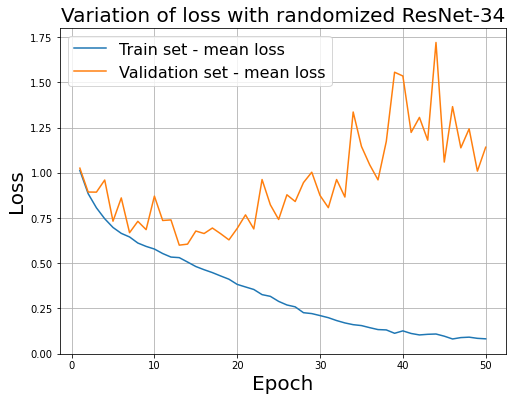

In [17]:
fig = plt.figure(figsize=(8, 6))
plt.plot(df_train_random.epoch, df_train_random.loss_train, "-", label="Train set - mean loss")
plt.plot(df_train_random.epoch, df_train_random.loss_valid, "-", label="Validation set - mean loss")
plt.ylabel("Loss", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.title("Variation of loss with randomized ResNet-34", fontsize=20)
plt.legend(fontsize=16)
plt.grid()
fig.show()

/tmp/ipykernel_8453/1033021737.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


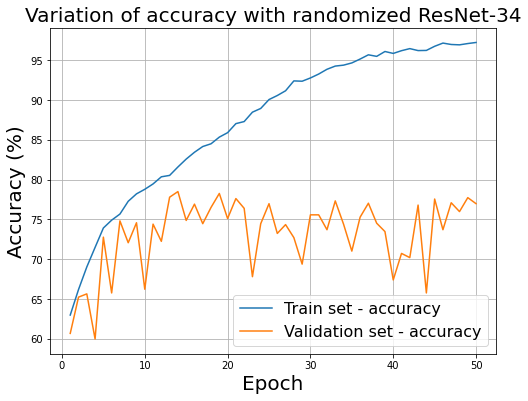

In [18]:
fig = plt.figure(figsize=(8, 6))
plt.plot(df_train_random.epoch, df_train_random.accuracy_train, "-", label="Train set - accuracy")
plt.plot(df_train_random.epoch, df_train_random.accuracy_valid, "-", label="Validation set - accuracy")
plt.ylabel("Accuracy (%)", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.title("Variation of accuracy with randomized ResNet-34", fontsize=20)
plt.legend(fontsize=16)
plt.grid()
fig.show()

## Confusion matrix for test set with pretrained ResNet-34

In [19]:
test_cm_pre = np.array(
    [[  96,   14,   11,   14,   69],
     [  23,  308,   16,   21,   68],
     [   5,   11,  349,   46,   37],
     [   7,   37,   82, 2487,   47],
     [  18,   22,   28,   36,  428]]
)

In [20]:
df_test_cm_pre = pd.DataFrame(test_cm_pre, 
                              index=list(dict_class_mapping.values()), 
                              columns=list(dict_class_mapping.values()))

In [21]:
sns.set(font_scale=1.6)

<AxesSubplot:title={'center':'Confusion matrix for test set with pretrained ResNet-34'}>

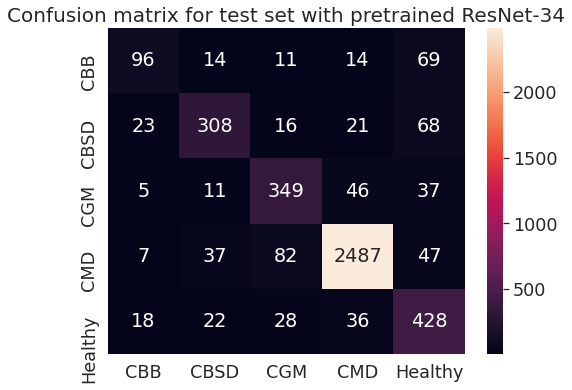

In [22]:
plt.figure(figsize=(8, 6))
plt.title("Confusion matrix for test set with pretrained ResNet-34", fontsize=20)
sns.heatmap(df_test_cm_pre, annot=True, fmt="g")

## Confusion matrix for test set with randomized ResNet-34

In [23]:
test_cm_random = np.array(
    [[  60,   66,   15,   21,   42],
     [  21,  312,   45,   41,   17],
     [   5,   31,  315,   73,   24],
     [   2,   69,  190, 2378,   21],
     [  51,   70,  126,   68,  217]]
)

In [24]:
df_test_cm_random = pd.DataFrame(test_cm_random, 
                                 index=list(dict_class_mapping.values()), 
                                 columns=list(dict_class_mapping.values()))

<AxesSubplot:title={'center':'Confusion matrix for test set with randomized ResNet-34'}>

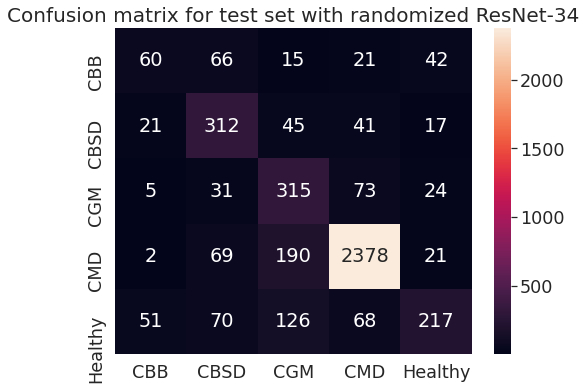

In [25]:
plt.figure(figsize=(8, 6))
plt.title("Confusion matrix for test set with randomized ResNet-34", fontsize=20)
sns.heatmap(df_test_cm_random, annot=True, fmt="g")